# Homework 02: Statistical analysis 

In [96]:
# import packages
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt


### 1. Metadata  
##### House Price Regression Dataset

|Attribute | Description |Type (Value) |
|---|---|---|
|**Hours_Studied**|number of hours spent studying per week| Numerical (Integer) |
|**Attendance**|percentage of classes attended|  Numerical (Integer)  |
|**Parental_Involvement**|Level of parental involvement in the students education|Categorical (Low, Medium, High)|
|**Access_to_Resources**|Availability of educational resources|Categorical (Low, Medium, High)|
|**Sleep_Hours**|Average number of hours of sleep per night|  Numerical (Integer)  |
|**Previous_Scores**|Scores from previous exams|  Numerical (Integer)  |
|**Tutoring_Sessions**|Number of tutoring sessions attended per month|  Numerical (Integer)  |
|**Family_Incoma**|Family income level|Categorical(Low, Medium, High)|
|**Teacher_Quality**|Quality of the teachers|Categorical (Low, Medium, High)|
|**School_Type**|Type of school attended|Categorical (Public, Private)|
|**Peer_Influence**|Influence of peers on academic performance|Categorical (Positive, Neutral, Negative)|
|**Physical_Activity**|Average number of hours of physical activity per week|  Numerical (Integer)  |
|**Parental_Education_Level**|Highest education level of parents|Categorical (High School, College, Postgraduate)|
|**Gender**|Gender of the student|Categorical (Male, Female)|
|**Exam_Score**|Final exam score| Numerical (Integer) |

In [97]:
# Define the column names as a list
column_names = ['Hours_Studied','Attendance','Parental_Involvement','Access_to_Resources','Sleep_Hours',
                'Previous_Scores','Tutoring_Sessions','Family_Income','Teacher_Quality','School_Type',
                'Peer_Influence','Physical_Activity','Parental_Education_Level','Gender','Exam_Score']

## 2. Load Dataset

In [98]:
dataset = pd.read_csv("dataset/Student.csv", sep = ",", skipinitialspace=True)
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Gender,Exam_Score
0,23,84,Low,High,7,73,0,Low,Medium,Public,Positive,3,High School,Male,67
1,19,64,Low,Medium,8,59,2,Medium,Medium,Public,Negative,4,College,Female,61
2,24,98,Medium,Medium,7,91,2,Medium,Medium,Public,Neutral,4,Postgraduate,Male,74
3,29,89,Low,Medium,8,98,1,Medium,Medium,Public,Negative,4,High School,Male,71
4,19,92,Medium,Medium,6,65,3,Medium,High,Public,Neutral,4,College,Female,70


In [99]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  6607
#Features =  15


In [100]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Gender,Exam_Score


**Missing values not have in this dataset**

## 3. Descriptive Statistical Analysis

#### Numerical variables

In [101]:
# list of numerical variables 
numerical_cols = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions","Physical_Activity","Exam_Score"]

**Histogram with Frequencies**

In [102]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

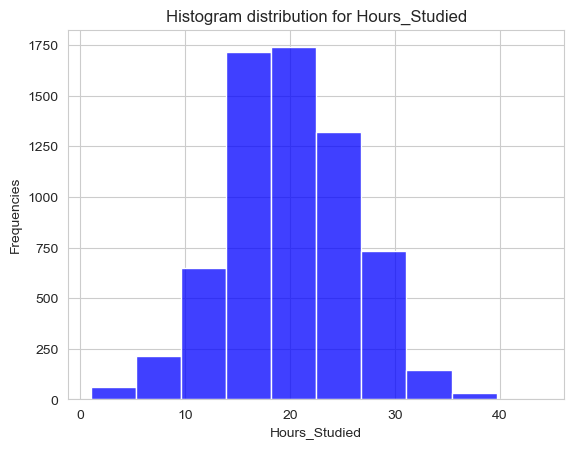

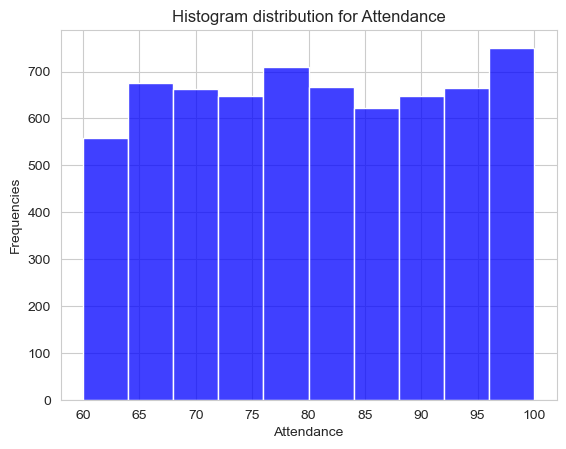

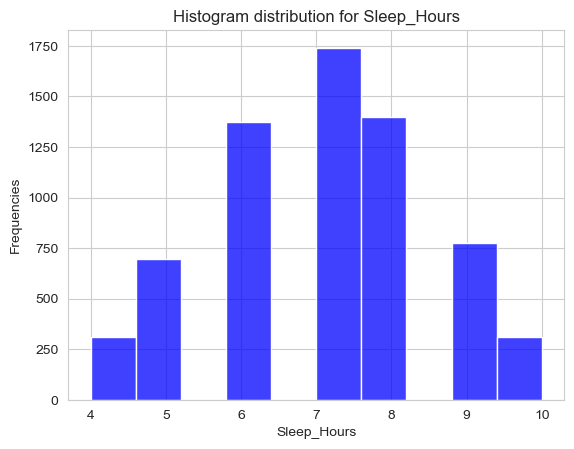

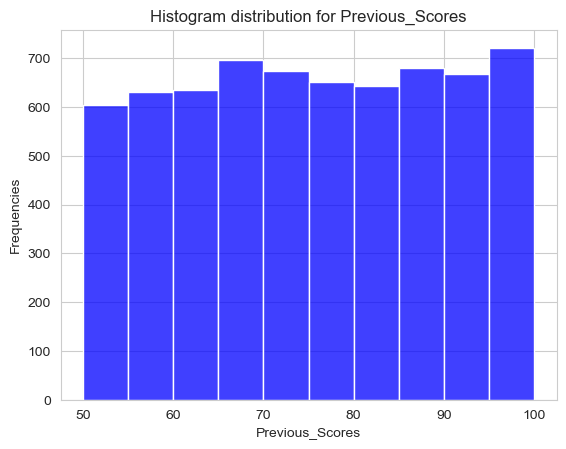

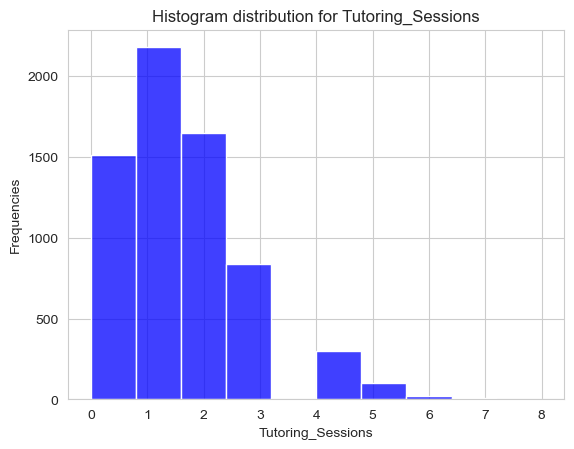

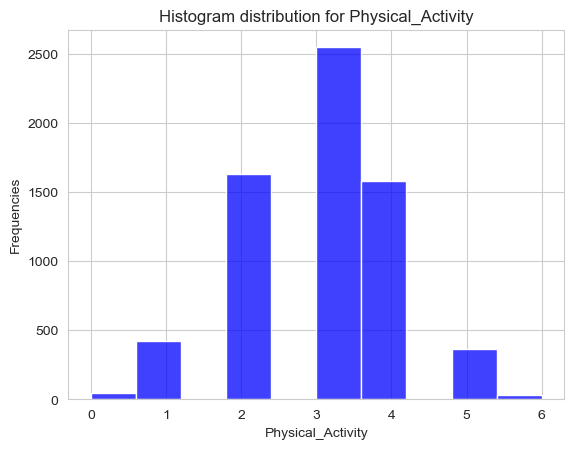

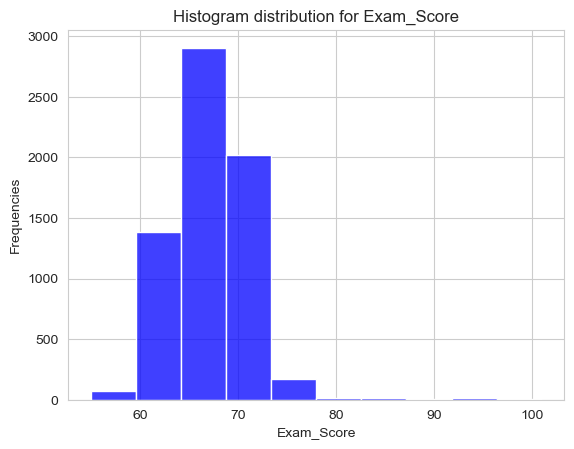

In [80]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

**Histogram with Densities and KDE line (kernel density estimate)**

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [103]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

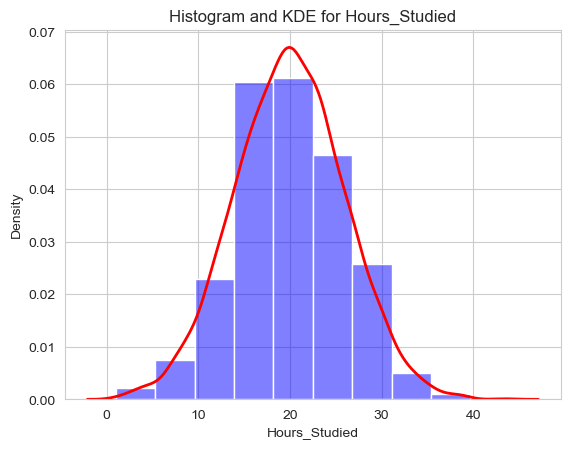

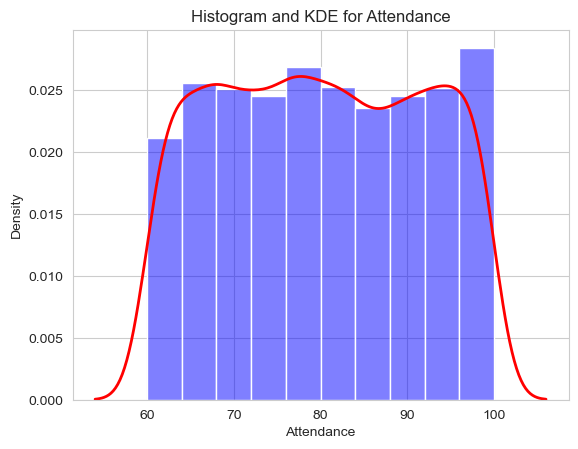

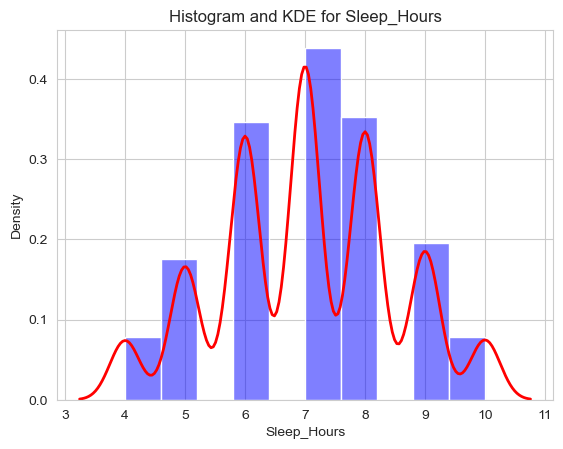

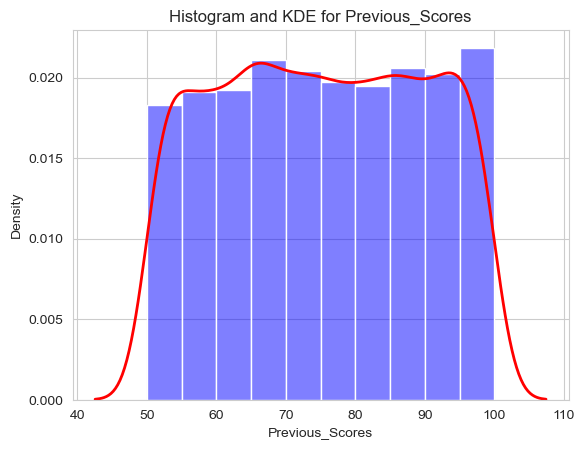

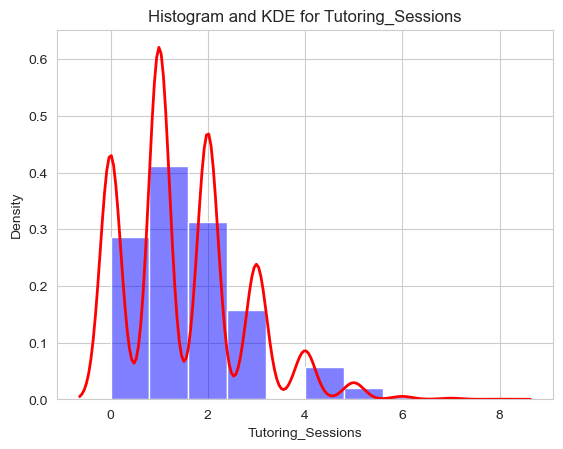

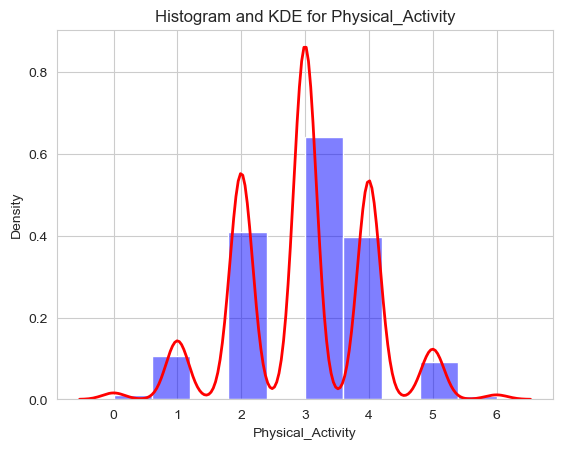

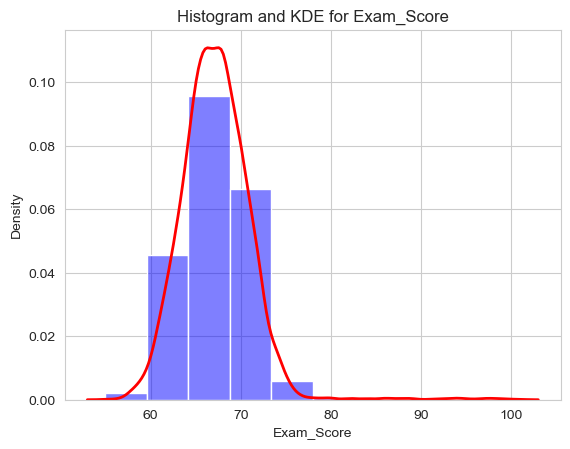

In [104]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

**Box Plot**

In [105]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
     # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
     # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

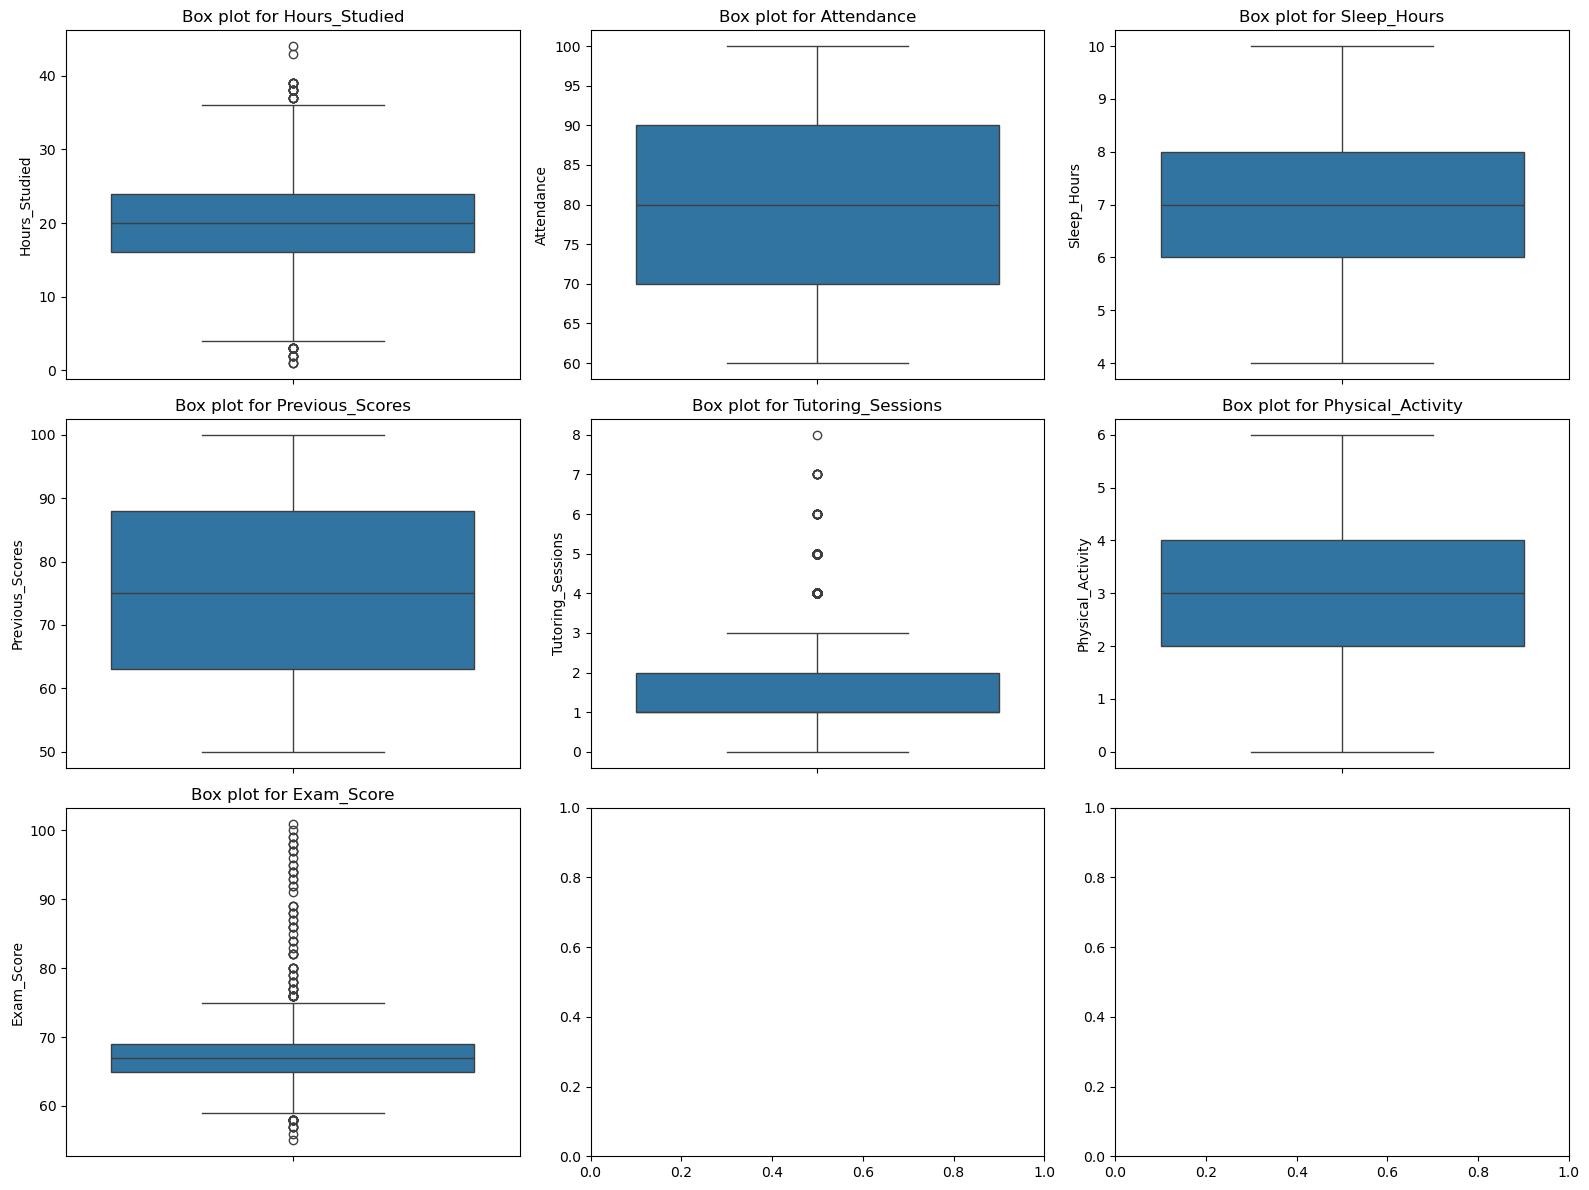

In [35]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

**Statistical metrics**

In [106]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**Correlation Analysis**

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [107]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

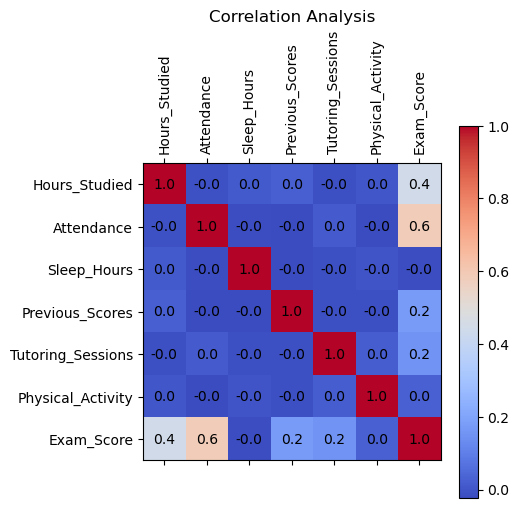

In [38]:
plot_correlation(dataset, numerical_cols)

**Implications of Low Correlation**

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

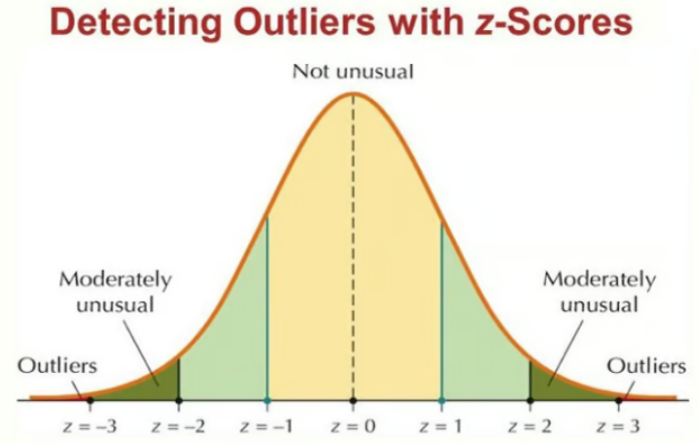

In [125]:
#function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

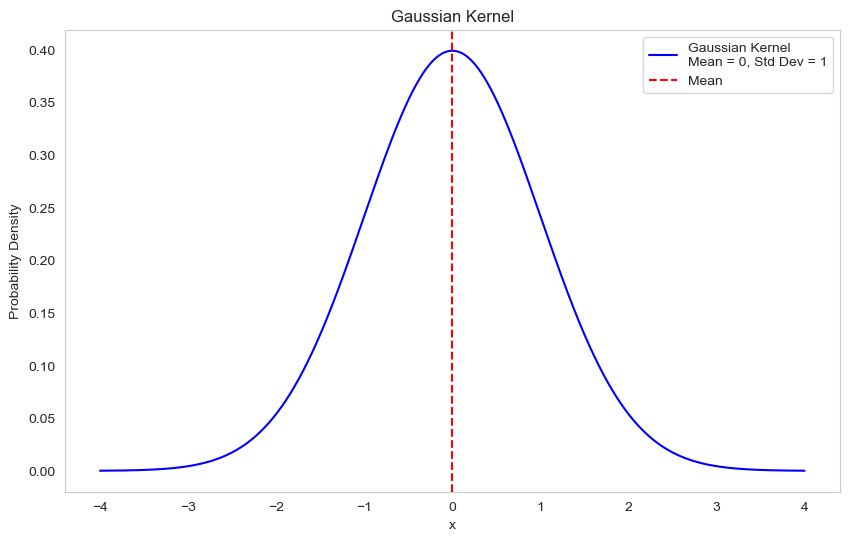

In [93]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [126]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [127]:
call_percentile(z = -2)

2.275

In [128]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    return outliers

In [129]:
outliers_detection(dataset, "Hours_Studied").head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Gender,Exam_Score
74,4,100,High,High,8,60,0,Medium,High,Private,Positive,4,College,Male,69
113,35,99,High,High,7,85,2,Medium,High,Private,Neutral,2,Postgraduate,Female,79
125,33,70,Medium,Medium,6,82,1,Low,High,Public,Neutral,4,College,Male,69
179,36,71,Medium,Medium,6,56,2,High,Medium,Public,Positive,2,High School,Male,69
209,43,86,High,Medium,7,97,2,Medium,High,Public,Positive,1,High School,Female,78


In [130]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Hours_Studied ***
#samples outlier to distribution = 249
%outliers = 3.77 %

*** Outliers detection in Attendance ***
#samples outlier to distribution = 168
%outliers = 2.54 %

*** Outliers detection in Sleep_Hours ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Previous_Scores ***
#samples outlier to distribution = 131
%outliers = 1.98 %

*** Outliers detection in Tutoring_Sessions ***
#samples outlier to distribution = 129
%outliers = 1.95 %

*** Outliers detection in Physical_Activity ***
#samples outlier to distribution = 78
%outliers = 1.18 %

*** Outliers detection in Exam_Score ***
#samples outlier to distribution = 269
%outliers = 4.07 %


### Categorical Variables

In [131]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['School_Type',
 'Peer_Influence',
 'Parental_Involvement',
 'Family_Income',
 'Parental_Education_Level',
 'Access_to_Resources',
 'Teacher_Quality',
 'Gender']

**Count instances for each categorical column**

In [132]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** School_Type ******
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

***** Peer_Influence ******
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

***** Parental_Involvement ******
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

***** Family_Income ******
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

***** Parental_Education_Level ******
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

***** Access_to_Resources ******
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

***** Teacher_Quality ******
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

***** Gender ******
Gender
Male      3814
Female    2793
Name: count, dtype: int64


**Bar chart (absolute)**

In [133]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y", color='blue')
    plt.title("Statistical analysis by " + col)
    plt.show()

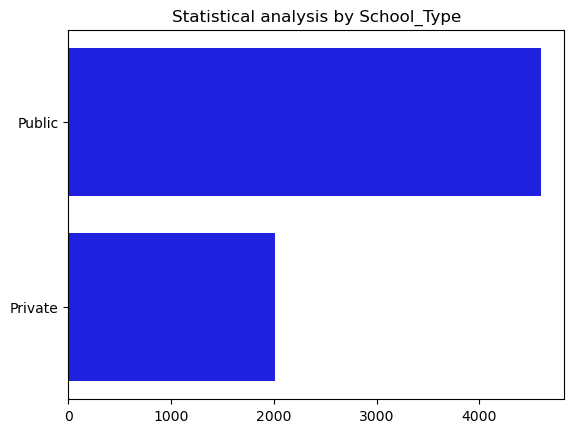

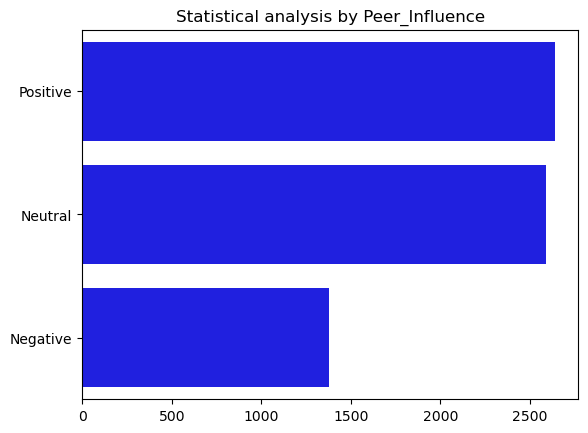

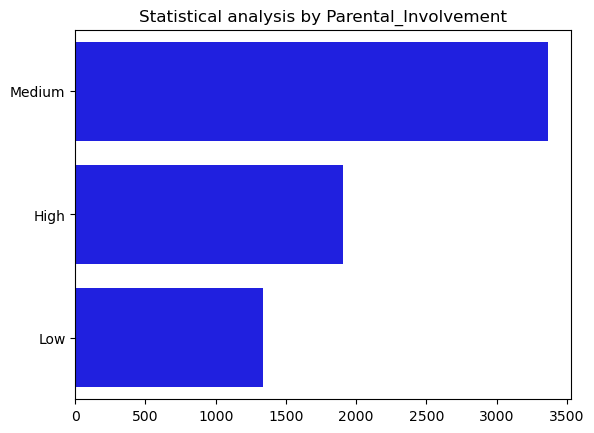

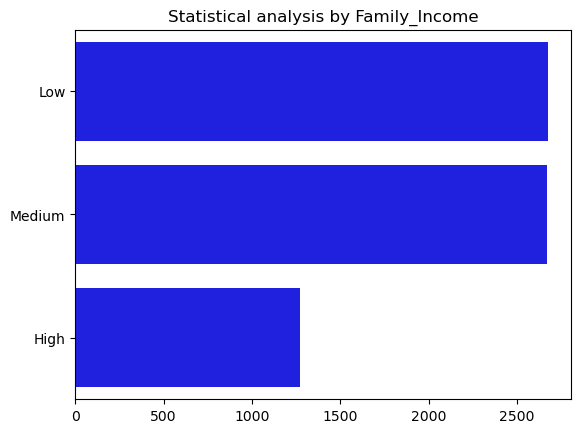

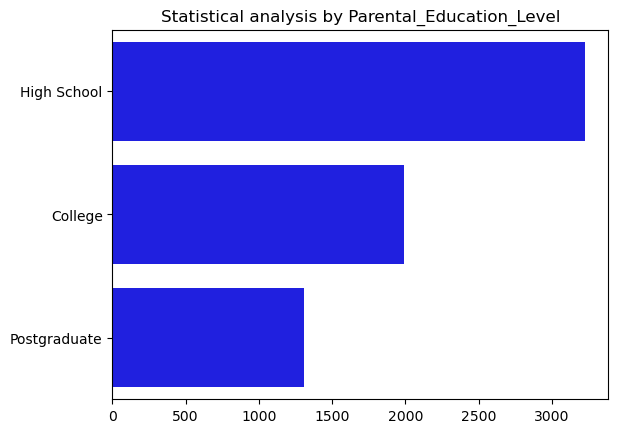

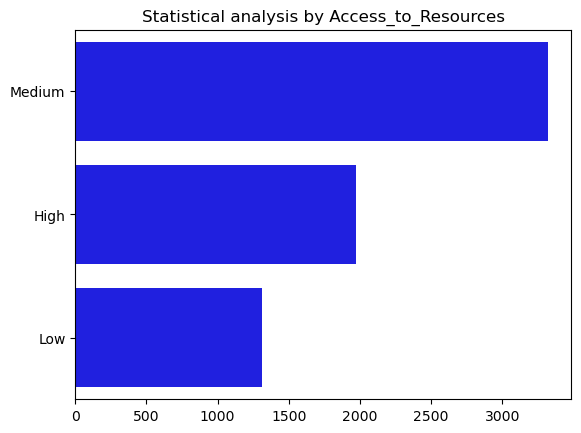

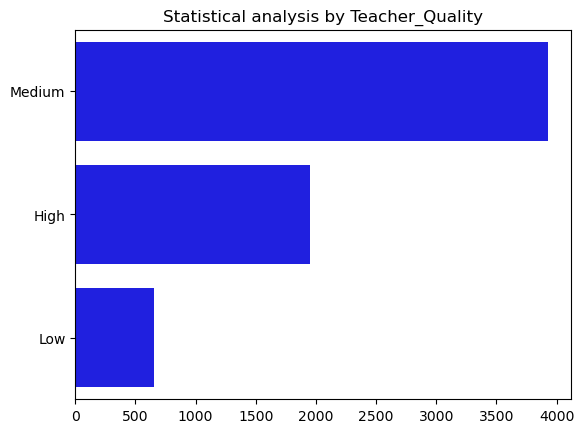

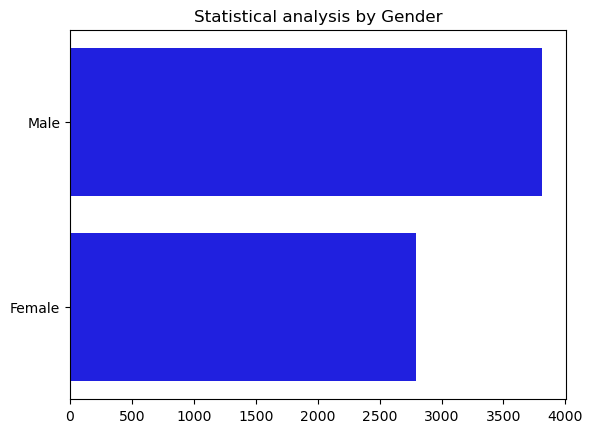

In [49]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

**Pie Chart (relative)**

In [134]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

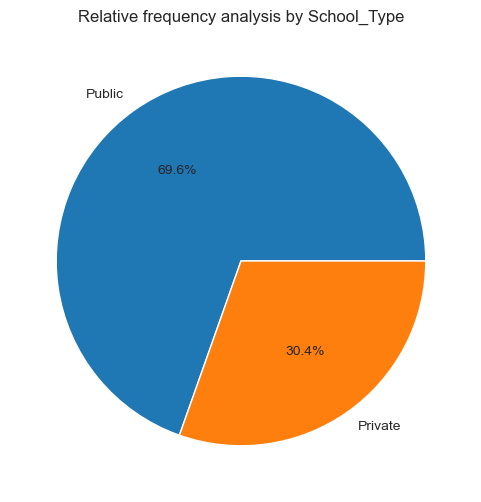

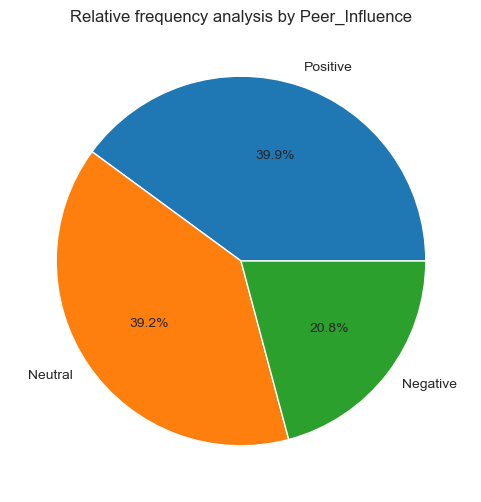

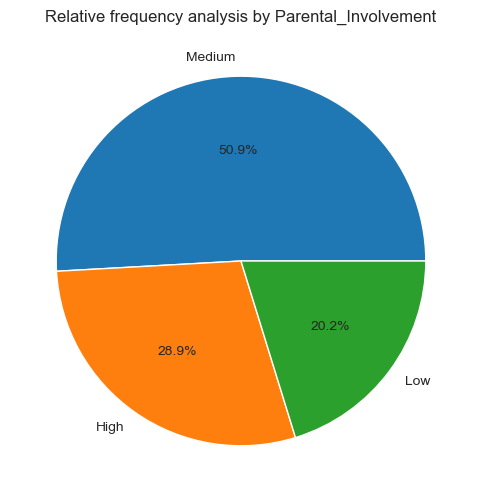

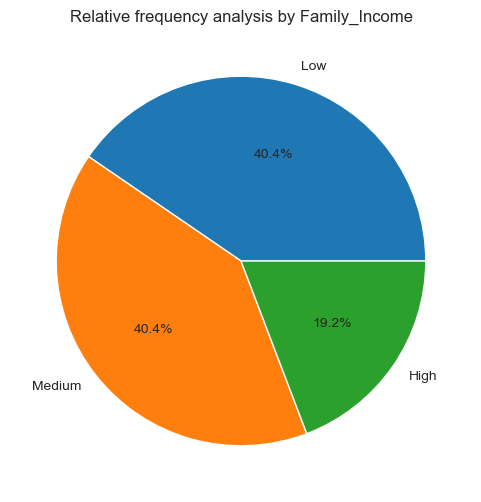

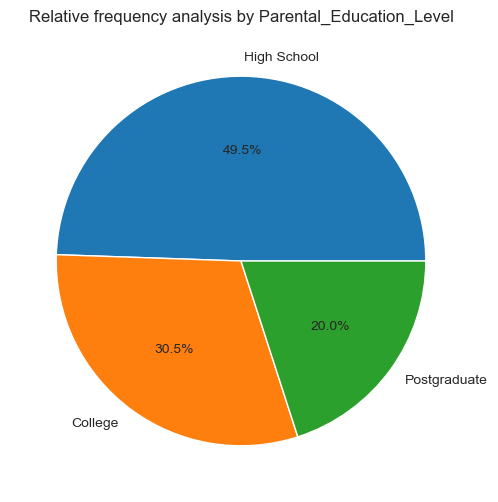

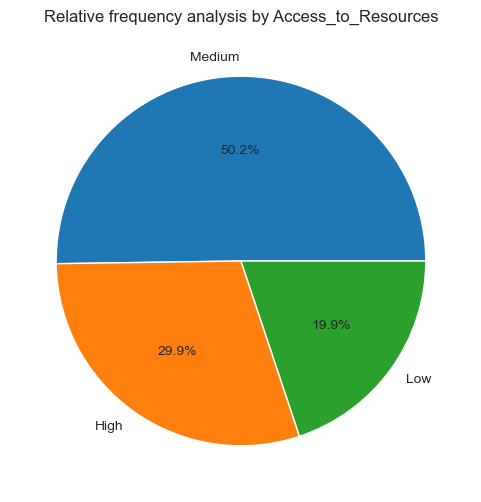

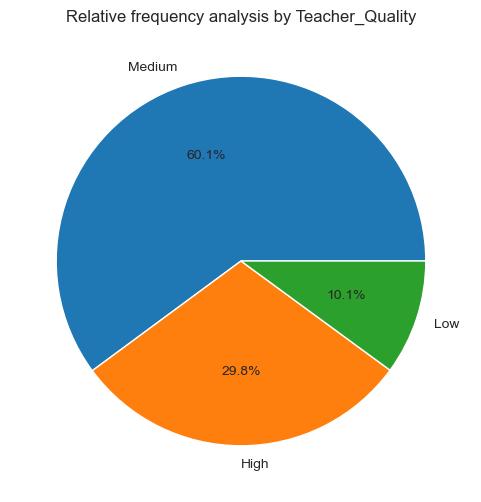

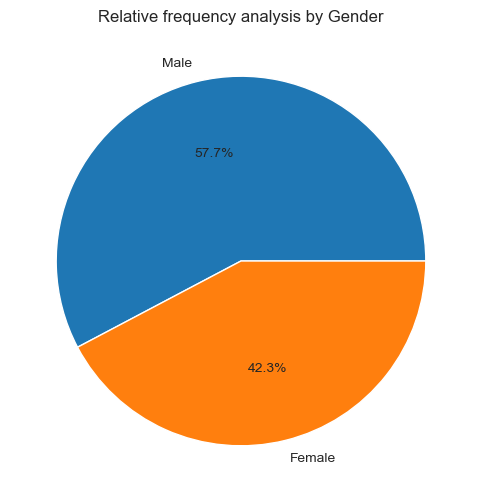

In [135]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

**Statistical Analysis (subgroups)**

In [136]:
# create groups organized by Gender and School_Type
group_sex_income = dataset.groupby(["Gender", "School_Type"]).size().reset_index(name = "count")
print(group_sex_income)

   Gender School_Type  count
0  Female     Private    843
1  Female      Public   1950
2    Male     Private   1166
3    Male      Public   2648


In [137]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "count", hue = g2, palette = "pastel")
    plt.xlabel('Gender')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Gender and School_Type')
    plt.tight_layout()
    plt.show()

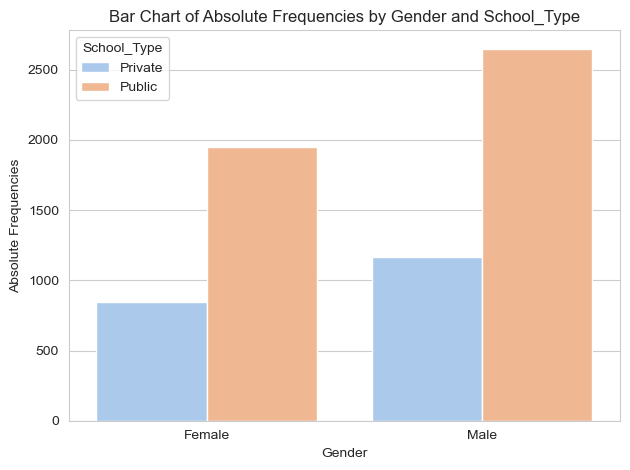

In [138]:
# function to plot relative frequencies for groups
plot_absfreq_groups(group_sex_income, "Gender", "School_Type")

In [139]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with School_Type" + group[g2]
    sizes = group["count"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and School_Type')
    plt.show()

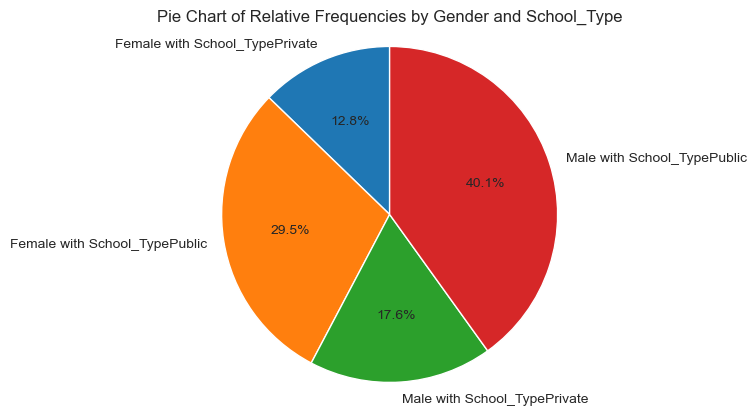

In [140]:
plot_relfreq_groups(group_sex_income, "Gender", "School_Type")